# Sharpe Ratio
### Using yfinance data downloader
### %matplotlib notebook for Jupyter interactive chart plotting

- yfinance
- pandas
- matplotlib

Indicators:
- ave return
- standard deviation
- sharpe ratio

In [9]:
!pip install yfinance

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
timeperiod=365

df = yf.Ticker("BA").history(start="2015-01-01", end="2021-07-20", interval="1d").reset_index()[["Date","Open"]]

In [12]:
df = df.rename(columns = {"Open":"ba"})
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
gedata = yf.Ticker("GE").history(start="2015-01-01", end="2021-07-20", interval="1d").reset_index()[["Date","Open"]]
gedata = gedata.rename(columns = {"Open":"ge"})
gedata["Date"] = pd.to_datetime(gedata["Date"])

In [14]:
df = df.merge(gedata, on="Date", how="left")

In [15]:
df["baret"] = 100 *(df["ba"]/df["ba"].shift(timeperiod) -1)
df["geret"] = 100 *(df["ge"]/df["ge"].shift(timeperiod) -1)

In [16]:
df["bastd"] = df["baret"].rolling(timeperiod).std()
df["gestd"] = df["geret"].rolling(timeperiod).std()

In [17]:
df["basharpe"] = df["baret"]/df["bastd"]
df["gesharpe"] = df["geret"]/df["gestd"]

<IPython.core.display.Javascript object>


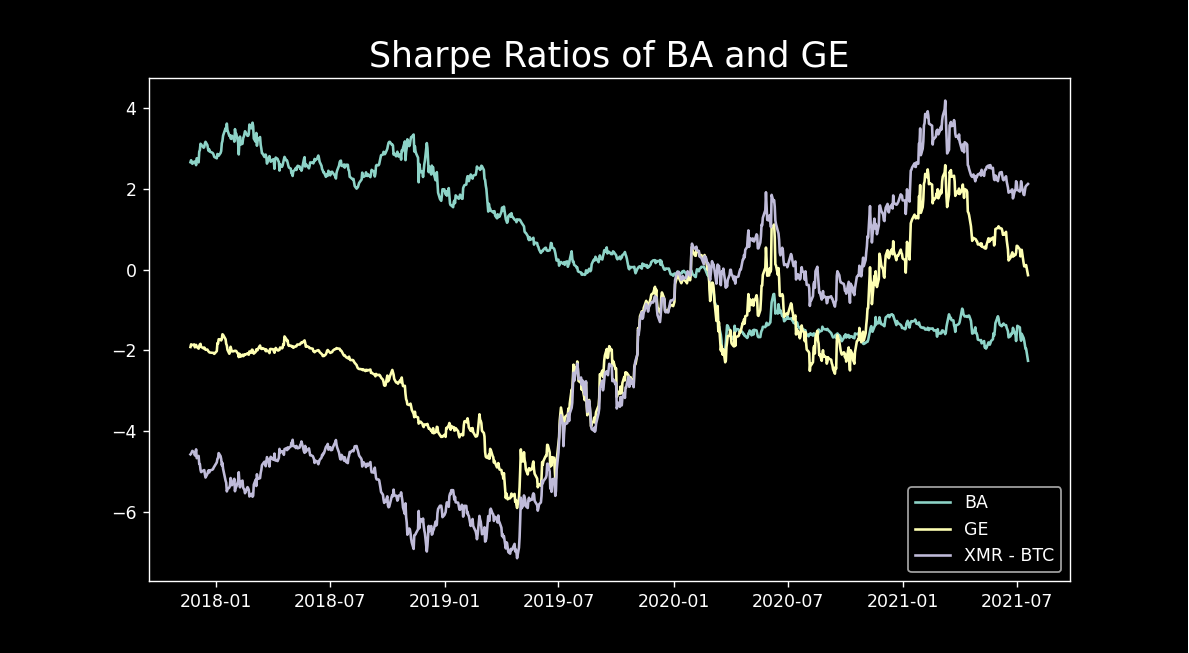

In [18]:
plt.style.use("dark_background")

plt.plot(df["Date"],df["basharpe"], label="BA")
plt.plot(df["Date"],df["gesharpe"], label="GE")
plt.plot(df["Date"],df["gesharpe"] - df["basharpe"], label="XMR - BTC")
plt.title("Sharpe Ratios of BA and GE", size = 20)
plt.legend()
plt.show()